<a href="https://colab.research.google.com/github/dnguyend/ManNullRange/blob/master/colab/StiefelLogarithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WORKBOOK TO CONTAINING THE ALGORITHM and data generation for Logarithm map on the Stiefel manifold

In [1]:
!git clone  https://github.com/pymanopt/pymanopt.git
import sys
sys.path.append("/content/pymanopt")

Cloning into 'pymanopt'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4127 (delta 0), reused 0 (delta 0), pack-reused 4124
Receiving objects: 100% (4127/4127), 900.80 KiB | 17.32 MiB/s, done.
Resolving deltas: 100% (2876/2876), done.


In [2]:
!git clone https://github.com/dnguyend/ManNullRange.git

Cloning into 'ManNullRange'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 244 (delta 159), reused 104 (delta 60), pack-reused 0
Receiving objects: 100% (244/244), 731.80 KiB | 7.95 MiB/s, done.
Resolving deltas: 100% (159/159), done.


# First step: import the library. As a sanity check we show the algorithm works for the sphere, a Stiefel manifold with $p=1$ column.

In [3]:
import numpy as np
from numpy.random import (randint, randn)
from numpy import zeros, zeros_like, trace, allclose

from ManNullRange.manifolds.RealStiefel import RealStiefel
from ManNullRange.tests.test_tools import (
    check_zero, make_sym_pos, random_orthogonal, timeout,
    TimeoutError)



In [5]:

def compare_with_sphere(m, NN):
    import numpy.linalg as la
    from numpy import bmat
    from scipy.linalg import expm, expm_frechet
    from ManNullRange.manifolds.tools import (
        vecah, unvecah, asym)
    from pymanopt.manifolds import Sphere
    
    np.random.seed(0)    
    alpha = np.array([1, .8])
    radius = 1.5
    d = 1
    # m, d = 3, 1
    man = RealStiefel(
        m, d, alpha=alpha,
        log_stats=True, log_method='trust-krylov')

    sp = Sphere(m)
    
    X = sp.rand()

    cnt = 0
    # NN = 100
    for i in range(NN):
        xi = sp.randvec(X)
        X1 = sp.exp(X, radius*np.pi*xi)
        v1 = sp.dist(X, X1)
        lgs, sts = man.log(X.reshape(-1, 1), X1.reshape(-1, 1), init_type=1)
        v2 = man.norm(X.reshape(-1, 1), lgs)
        if np.abs(v1 - v2) > 1e-4:
            print(i, v1, v2, v1-v2, (v1+v2)/np.pi)
            print(check_zero(X[None, :]@lgs))
            X1a = man.exp(X[:, None], lgs)
            print(check_zero(X1a.T@X1a - np.eye(X1a.shape[1])))
            print(sts)
            # pdb.set_trace()
            cnt += 1
    print('Sphere in R^%d with %d samples ' % (m, NN))        
    print('number of mismatch %d. Percent of mismatch  %f ' % (cnt, cnt/NN))
    
compare_with_sphere(30, 100)

Sphere in R^30 with 100 samples 
number of mismatch 0. Percent of mismatch  0.000000 


# Show length of closed geodesics. On a sphere, every geodesics is closed. On a Stiefel manifold we show one family of closed geodesics, but there are also sphere-like geodesics

In [6]:
# CHECK FORMULA FOR CLOSED GEODESIC.
# Closed geodesics are geodesics that comeback to the original point
def closed_geodesics(m , d):        
    import numpy.linalg as la
    from numpy import bmat
    from scipy.linalg import expm, expm_frechet
    from ManNullRange.manifolds.tools import (
        vecah, unvecah, asym, sym)

    # m, d = (1000, 40)
    # m, d = (4, 2)
    alpha = np.zeros(2)
    alpha[0] = 1
    alpha[1] = 1
    man = RealStiefel(
        m, d, alpha=alpha, log_stats=True, log_method='trust-krylov')
    for alx in range(1, 10):
        man.alpha[1] = alx*.000001
        X = man.rand()
        A = np.zeros((d, d))
        A[0, 1] = - 2*np.pi
        A[1, 0] = 2*np.pi
        eta = X@A
        if check_zero(man.exp(X, eta) - X) > 1e-5:
            print("not good %f" % man.alpha[1])
        print('checking formula for close geodesics m=%d d=%d alpha = %f' %(m, d, man.alpha[1]))
        print('direct calc %f formula %f diff %f' %
            (man.norm(X, eta), 2*np.pi*np.sqrt(2*man.alpha[1]), man.norm(X, eta) - 2*np.pi*np.sqrt(2*man.alpha[1])))

closed_geodesics(4, 2)
closed_geodesics(100, 5)



checking formula for close geodesics m=4 d=2 alpha = 0.000001
direct calc 0.008886 formula 0.008886 diff 0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000002
direct calc 0.012566 formula 0.012566 diff -0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000003
direct calc 0.015391 formula 0.015391 diff 0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000004
direct calc 0.017772 formula 0.017772 diff -0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000005
direct calc 0.019869 formula 0.019869 diff 0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000006
direct calc 0.021766 formula 0.021766 diff -0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000007
direct calc 0.023510 formula 0.023510 diff -0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000008
direct calc 0.025133 formula 0.025133 diff 0.000000
checking formula for close geodesics m=4 d=2 alpha = 0.000009
direct calc 0.026657 f

# COMPARING TWO INITIALIZATIONS

We use $St(20, 1000)$ here, $St(50, 1000)$ is slow on the colab cloud.

In [7]:
def compare_two_init(m, d, NN):
    import numpy.linalg as la
    from numpy import bmat
    from scipy.linalg import expm, expm_frechet
    from ManNullRange.manifolds.tools import (
        vecah, unvecah, asym, sym)
    
    alpha = np.zeros(2)
    alpha[0] = 1
    alpha[1] = 1
    man = RealStiefel(
        m, d, alpha=alpha, log_stats=True, log_method='trust-krylov')
    
    mean_sts = {}
    klist = ['nit', 'nfev', 'njev', 'nhev', 'success', 'dist', 'improve']
    fts = dict((kk, 1) for kk in klist)
    fts['success'] = 100

    for radius in [.5, .99, 1.3]:
        rkey = 'rd%0.2f' % radius
        mean_sts[rkey] = {}
        for alx in np.array([1, 5, 10, 12]):
            tots = dict((k, {0: 0, 1: 0}) for k in klist)        
            X = man.rand()        
            np.random.seed(0)            
            man.alpha[1] = alx*.1
            print('Doing %s %f' % (rkey, man.alpha[1]))
            cnt = 0
            all_sts = {}
            for i in range(NN):
                xi = man.randvec(X)
                X1 = man.exp(X, radius*np.pi*xi)
                lgs0, sts0 = man.log(
                    X, X1, init_type=0)
                lgs1, sts1 = man.log(
                    X, X1, init_type=1)
                msg0 = dict(sts0)
                msg1 = dict(sts1)            
                all_sts[i] = {0: sts0, 1: sts1}
                v0 = man.norm(X, lgs0)
                v1 = man.norm(X, lgs1)
                if man.norm(X, (man.exp(X, lgs0) - X1)) > 1e-3:
                    msg0['success'] = False
                elif v0 <= radius*np.pi + 1e-3:
                    tots['dist'][0] += 1
                    tots['improve'][0] += 1-man.norm(X, lgs0)/radius/np.pi
                if man.norm(X, (man.exp(X, lgs1) - X1)) > 1e-3:
                    msg1['success'] = False
                elif v1 <= radius*np.pi + 1e-3:
                    tots['dist'][1] += 1
                    tots['improve'][1] += 1-man.norm(X, lgs1)/radius/np.pi
                                        
                for kk in klist:
                    if kk in msg0:
                        tots[kk][0] += msg0[kk]
                    if kk in msg1:
                        tots[kk][1] += msg1[kk]
                # tots['dist'][0] += 
                # tots['dist'][1] += int(v1 <= radius*np.pi + 1e-3)

                if np.abs(v0 - v1) > 1e-3:
                    print('rkey=%s alx=%d i=%d v0=%f v1=%f v0-v1=%f (v0+v1)/pi=%f' %
                          (rkey, alx, i, v0, v1, v0-v1, (v0+v1)/np.pi))
                    print('check sym 0 %f' % check_zero(sym(X.T@lgs0)))
                    print('check sym 1 %f ' % check_zero(sym(X.T@lgs1)))
                    X1a = man.exp(X, lgs1)
                    print('check reach target %f' %
                          check_zero(X1a.T@X1a - np.eye(X1a.shape[1])))
                    print('status 0:')
                    print(sts0)
                    print('status 1:')
                    print(sts1)
                    # pdb.set_trace()
                    cnt += 1
            mean_sts[rkey][alx] = dict((kk, [tots[kk][0]/NN*fts[kk],
                                             tots[kk][1]/NN*fts[kk]])
                                       for kk in klist)
            print('Discepancy count %d percent %f ' % (cnt, cnt/NN))
        print(mean_sts[rkey])
    fname = 'tbl_stief_r_al_m%d_d%d.p' % (
        m, d)
    np.savez_compressed(fname, mean_sts)
compare_two_init(m=1000, d=20, NN=50)

Doing rd0.50 0.100000
Discepancy count 0 percent 0.000000 
Doing rd0.50 0.500000
Discepancy count 0 percent 0.000000 
Doing rd0.50 1.000000
Discepancy count 0 percent 0.000000 
Doing rd0.50 1.200000
Discepancy count 0 percent 0.000000 
{1: {'nit': [3.0, 2.0], 'nfev': [4.0, 3.0], 'njev': [4.0, 3.0], 'nhev': [8.0, 7.0], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [-1.108242809432003e-05, -1.2012808629613402e-07]}, 5: {'nit': [3.54, 2.0], 'nfev': [4.54, 3.0], 'njev': [4.54, 3.0], 'nhev': [11.1, 7.0], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [2.627691622452133e-06, -1.4219792354719373e-08]}, 10: {'nit': [3.0, 1.0], 'nfev': [4.0, 2.0], 'njev': [4.0, 2.0], 'nhev': [6.0, 2.0], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [4.751833304617037e-10, -5.486847848290566e-07]}, 12: {'nit': [3.0, 2.0], 'nfev': [4.0, 3.0], 'njev': [4.0, 3.0], 'nhev': [7.0, 6.0], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [4.676404217900387e-06, -2.4639135491888

In [8]:
compare_two_init(m=4, d=2, NN=50)

Doing rd0.50 0.100000
Discepancy count 0 percent 0.000000 
Doing rd0.50 0.500000
Discepancy count 0 percent 0.000000 
Doing rd0.50 1.000000
Discepancy count 0 percent 0.000000 
Doing rd0.50 1.200000
Discepancy count 0 percent 0.000000 
{1: {'nit': [4.62, 3.62], 'nfev': [5.62, 4.62], 'njev': [5.62, 4.62], 'nhev': [15.08, 13.46], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [-9.305273070745467e-06, -4.101997848324767e-06]}, 5: {'nit': [4.4, 3.12], 'nfev': [5.4, 4.12], 'njev': [5.4, 4.12], 'nhev': [13.44, 10.6], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [-8.222966043880398e-07, -9.937854666874912e-07]}, 10: {'nit': [3.98, 2.8], 'nfev': [4.98, 3.8], 'njev': [4.98, 3.8], 'nhev': [11.52, 9.54], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [5.070762873882195e-07, -2.2543519418549706e-07]}, 12: {'nit': [4.0, 2.98], 'nfev': [5.0, 3.98], 'njev': [5.0, 3.98], 'nhev': [11.82, 10.98], 'success': [100.0, 100.0], 'dist': [1.0, 1.0], 'improve': [-7.49806248228

Some codes to format the result to nice latex format

In [11]:
def print_tbl(mean_sts):
    header = [r'dist ($\pi$)', r'$\alpha$', r'\#Iteration', r'\#Calc',
              r'\%Succ', '\\%Improve', '\\%Not worse distance']
    radius = sorted(mean_sts)

    def print_block():
        for r in radius:
            for alf in sorted(mean_sts[r].keys()):
                ddc = mean_sts[r][alf]
                out_str = '%s & %0.2f & %0.2f/%0.2f & %.2f/%.2f &  %.f/%.f & %.f/%.f & %.f/%.f\\\\'
                print(
                    out_str % (
                        r[2:], alf / 10, ddc['nit'][0], ddc['nit'][1],
                        ddc['nfev'][0] + 4*ddc['nhev'][0] + 2*ddc['njev'][0],
                        ddc['nfev'][1] + 4*ddc['nhev'][1] + 2*ddc['njev'][1],
                        ddc['success'][0], ddc['success'][1],
                        np.abs(ddc['improve'][0]*100), np.abs(ddc['improve'][1]*100),
                        ddc['dist'][0]*100, ddc['dist'][1]*100))
    print('&'.join(header) + r'\\')
    print_block()
    

m1000_40 = np.load('tbl_stief_r_al_m1000_d20.p.npz', allow_pickle=True)['arr_0'].tolist()
print_tbl(m1000_40)

m4_2 = np.load('tbl_stief_r_al_m4_d2.p.npz', allow_pickle=True)['arr_0'].tolist()
print_tbl(m4_2)
    


dist ($\pi$)&$\alpha$&\#Iteration&\#Calc&\%Succ&\%Improve&\%Not worse distance\\
0.50 & 0.10 & 3.00/2.00 & 44.00/37.00 &  100/100 & 0/0 & 100/100\\
0.50 & 0.50 & 3.54/2.00 & 58.02/37.00 &  100/100 & 0/0 & 100/100\\
0.50 & 1.00 & 3.00/1.00 & 36.00/14.00 &  100/100 & 0/0 & 100/100\\
0.50 & 1.20 & 3.00/2.00 & 40.00/33.00 &  100/100 & 0/0 & 100/100\\
0.99 & 0.10 & 4.00/3.00 & 75.00/63.52 &  100/100 & 0/0 & 100/100\\
0.99 & 0.50 & 4.00/3.00 & 62.44/64.88 &  100/100 & 0/0 & 100/100\\
0.99 & 1.00 & 3.00/2.00 & 36.00/34.28 &  100/100 & 0/0 & 100/100\\
0.99 & 1.20 & 4.00/2.00 & 55.00/31.16 &  100/100 & 0/0 & 100/100\\
1.30 & 0.10 & 5.00/3.00 & 94.48/72.24 &  100/100 & 0/0 & 100/100\\
1.30 & 0.50 & 5.00/3.00 & 85.84/60.32 &  100/100 & 0/0 & 100/100\\
1.30 & 1.00 & 4.00/2.00 & 47.00/29.00 &  100/100 & 0/0 & 100/100\\
1.30 & 1.20 & 5.00/2.00 & 76.32/33.00 &  100/100 & 0/0 & 100/100\\
dist ($\pi$)&$\alpha$&\#Iteration&\#Calc&\%Succ&\%Improve&\%Not worse distance\\
0.50 & 0.10 & 4.62/3.62 & 77.18/67

# DOING RIEMANNIAN CENTER OF MASS

In [12]:
@timeout(130)
def long_log(man, Y1, Y2, init_type):
    return man.log(Y1, Y2, init_type=init_type)


def RCM(man, Q, init_idx=None, init_type=0):
    m, d = man.n, man.d
    N = Q.shape[2]
    n_iter = 100
    nspl = np.random.choice(
        N, size=min(N-1, N // 1 + 1), replace=False)
    a, _, b = np.linalg.svd(0.7*Q[:, :, 6] + 0.3*Q[:, :, nspl].mean(axis=2), full_matrices=False)
    if init_idx is None:
        Yi = a@b
    else:
        Yi = Q[:, :, init_idx]

    def appx_log(Y1, Y2):
        return man.proj(Y1, Y2-Y1)
        
    Yinew = Yi.copy()
    k_list = ['success', 'nfev', 'njev', 'nhev', 'nit']
    tot_stats = dict((kk, 0) for kk in k_list)
    tot_stats['cnt'] = 0
    tot_mean = {}
    itr_mean = {}
    for itr in range(n_iter):
        logs = np.zeros((m, d))
        itr_stats = dict((kk, 0) for kk in k_list)
        itr_stats['cnt'] = 0
        itr_mean[itr] = {}
        variance = 0
        for i in range(N):
            itr_stats['cnt'] += 1
            tot_stats['cnt'] += 1
            if not man.log_stats:
                ret = man.log(Yi, Q[:, :, i], init_type=init_type)
            else:
                tout = False
                try:
                    # ret, sts = man.log(Yi, Q[:, :, i])
                    ret, sts = long_log(man, Yi, Q[:, :, i], init_type=init_type)
                except TimeoutError as exc:
                    tout = True
                    print('NOT SUCCESS')
                    ret = appx_log(Yi, Q[:, :, i])
                    sts = [('success', False), ('message', 'timeout')]

                msg = dict(sts)
                for kk in k_list:
                    if tout:
                        if kk != 'success':
                            itr_stats[kk] += 1/N*itr_stats[kk]
                            tot_stats[kk] += 1/N*itr_stats[kk]
                    elif kk in msg:
                        itr_stats[kk] += msg[kk]
                        tot_stats[kk] += msg[kk]
                if False or (msg['success'] is not True):
                    print('itr = %d i=%d %s' % (itr, i, str(msg)))
            jlogs = man.J(Yi, ret)
            if np.isnan(ret).sum() == 0:
                logs += 1/N*ret
                variance += 1/N*man.inner(Yi, ret, ret)
        nlg = man.norm(Yi, logs)
        for kk in k_list:
            if kk == 'success':
                itr_mean[itr][kk] = itr_stats[kk] / itr_stats['cnt']
            else:
                itr_mean[itr][kk] = itr_stats[kk] / itr_stats['success']
                
        # sometime the optimizer return sucess = False
        # but opt value is still good to use
        # so count of success does not mean that much
        # iteration get much slower
        itr_mean[itr]['success'] *= 100
        itr_mean[itr]['norm_RCM_gradient'] = nlg
        itr_mean[itr]['RCM_variance'] = variance
        # print('itr=%d dis=%f %s' % (itr, nlg, str(itr_mean)))
        if nlg < 1e-4:
            break
        Yinew = man.exp(Yi, logs)
        Yi = Yinew
        for kk in k_list:
            if kk == 'success':
                tot_mean[kk] = (tot_stats[kk] / tot_stats['cnt'])
            else:
                tot_mean[kk] = (tot_stats[kk] / tot_stats['success'])
        tot_mean['success'] *= 100
              
    return Yi, tot_mean, itr_mean
                
def riemannian_center_of_mass_loop(m, d, N):
    # now do Riemannian center of mass
    import time
    np.random.seed(0)
    radius = .5
    alpha = np.zeros(2)
    alpha[0] = 1
    alpha[1] = 1

    # m, d = (1000, 50)

    # N = 50
    man = RealStiefel(
        m, d, alpha=alpha, log_stats=False, log_method='trust-krylov')
    # man.log_gtol = 1e-6

    Q = np.zeros((m, d, N))
    Y = man.rand()
    fts = np.zeros(N)
    for i in range(N):
        fts[i] = np.random.uniform(radius*.8, radius)*np.pi
        Q[:, :, i] = man.exp(Y, fts[i]*man.randvec(Y))

    man.log_stats = True
    tot_stats_all = {}

    for alx in [1, 5, 10]:
        start_time = time.time()
        
        man.alpha[1] = alx*.1
        man.log_stats = True
        if alx == 10:
            ctr, tot_stats, itr_stats = RCM(man, Q, 0, init_type=1)
        else:
            ctr, tot_stats, itr_stats = RCM(man, Q, 0, init_type=1)
        print('m=%d d=%d alpha_1=%f radius=%f dist_to_y=%f' %
              (*ctr.shape, man.alpha[1], radius,
               man.norm(Y, man.log(Y, ctr)[0])))
        for itr in sorted(itr_stats.keys()):
            print('itr=%d stat=%s' % (itr, itr_stats[itr]))
        print(tot_stats)
        tot_stats_all[alx] = (tot_stats, itr_stats)
        end_time = time.time()
        print(start_time, end_time, end_time - start_time)
    import pickle
    with open('rcm_stiefl.p', 'wb') as ff:
        pickle.dump(tot_stats_all, ff)

riemannian_center_of_mass_loop(1000, 50, 50)

m=1000 d=50 alpha_1=0.100000 radius=0.500000 dist_to_y=0.199731
itr=0 stat={'success': 100.0, 'nfev': 2.94, 'njev': 2.94, 'nhev': 6.86, 'nit': 1.96, 'norm_RCM_gradient': 1.436892603279289, 'RCM_variance': 3.9858608750163627}
itr=1 stat={'success': 100.0, 'nfev': 3.0, 'njev': 3.0, 'nhev': 11.7, 'nit': 2.0, 'norm_RCM_gradient': 0.018653313681386657, 'RCM_variance': 1.8943961906755795}
itr=2 stat={'success': 100.0, 'nfev': 3.0, 'njev': 3.0, 'nhev': 13.58, 'nit': 2.0, 'norm_RCM_gradient': 0.00024324399866782845, 'RCM_variance': 1.8940437035587145}
itr=3 stat={'success': 100.0, 'nfev': 3.0, 'njev': 3.0, 'nhev': 14.1, 'nit': 2.0, 'norm_RCM_gradient': 3.2107271524509365e-06, 'RCM_variance': 1.8940436537675123}
{'success': 100.0, 'nfev': 2.98, 'njev': 2.98, 'nhev': 10.713333333333333, 'nit': 1.9866666666666666}
1609694155.588852 1609694517.5249045 361.9360525608063
m=1000 d=50 alpha_1=0.500000 radius=0.500000 dist_to_y=0.200647
itr=0 stat={'success': 100.0, 'nfev': 2.94, 'njev': 2.94, 'nhev': 

# SPECTRA OF HESSIAN
This code computes the Hessian at a local minima, for two points $\tilde{Y}$ and $Z$ with $Z= Exp_{\tilde{Y}}t\eta_*$. Thus $t\eta_*$ is a local minima of the optimization problem finding $\eta$ to minimize $\|Z - Exp_{\tilde{Y}}\eta\|_F^2$.

We find the value of $t$ so the smallest eigenvalue of the Hessian is close to zero by minimizing the eigenvalue within abound of up to $1.4\pi$.
It also report instances where the eigenvalues does not get small enough, likely because there is a direction where the cut off is further than $1.4\pi$. We see the eigenvalue mostly get smaller than $5\times 10^{-2}$ in these cases.

In [13]:
import numpy.linalg as la
from numpy import bmat
from scipy.linalg import expm, expm_frechet
from ManNullRange.manifolds.tools import (
    vecah, unvecah, asym)

# m, d = (1000, 50)
def vec(A, R):
    return np.concatenate(
        [vecah(A), R.reshape(-1)])

def unvec(avec):
    return unvecah(avec[:adim]), avec[adim:].reshape(k, d)

def conv_to_tan(A, R):
    return Y@A + Q@R

def calc_hessian_spec(lgs, Y1):        
    def dist(v):
        alf = man.alpha[1]/man.alpha[0]
        A, R = unvec(v)
        ex2 = expm(
            np.array(
                bmat([[2*alf*A, -R.T], [R, np.zeros((k, k))]])))
        M = ex2[:d, :d]
        N = ex2[d:, :d]

        return -np.trace(Y1.T@(Y@M+Q@N)@expm((1-2*alf)*A))    

    def jac(v):
        alf = man.alpha[1]/man.alpha[0]
        A, R = unvec(v)
        ex1 = expm((1-2*alf)*A)

        mat = np.array(bmat([[2*alf*A, -R.T], [R, np.zeros((k, k))]]))
        E = np.array(bmat(
            [[ex1@Y1.T@Y, ex1@Y1.T@Q],
              [np.zeros_like(R), np.zeros((k, k))]]))

        ex2, fe2 = expm_frechet(mat, E)
        M = ex2[:d, :d]
        N = ex2[d:, :d]
        YMQN = (Y@M+Q@N)

        partA = asym(
            (1-2*alf)*expm_frechet((1-2*alf)*A, Y1.T@YMQN)[1])

        partA += 2*alf*asym(fe2[:d, :d])
        partR = -(fe2[:d, d:].T - fe2[d:, :d])

        return vec(partA, partR)

    def hessp(v, xi):
        dlt = 1e-8
        return (jac(v+dlt*xi) - jac(v))/dlt

    mat = np.zeros((tdim, tdim))
    Alg = Y.T@lgs
    Rlgs = Q.T@lgs
    vlgs = vec(Alg, Rlgs)
    for i in range(tdim):
        av = np.zeros(tdim)
        av[i] = 1
        mat[:, i] = hessp(vlgs, av)
    mat = 0.5*(mat + mat.T)
    evl, evec = la.eigh(mat)
    return evl

    v = np.zeros(tdim)

    # A0, R0 = unvec(np.zeros((tdim)))
    # Q = make_Q(k)
    spt = calc_hessian_spec(np.zeros((m, d)), Y1)
    print(spt)


Compute the Hessian at the critical point $t\eta_*$ and find $t$ such that the Hessian becomes degenerate. This may be slow on the colab cloud. The number of dimensions is $dk +d(d-1)/2$ with $d=k=4$ in this example, so there are $22$ Hessian to evaluate for each $t$ (and each sample $\eta_*$ and each alpha). We run a search on $t$ to minimize the smallest eigenvalue, so that is another multiple on top. At the end of the day we get an empirical picture of the cut locus.

Doing alpha=0.010000
Doing alpha=0.110000
Doing alpha=0.210000
Doing alpha=0.310000
Doing alpha=0.410000
Doing alpha=0.510000
Doing alpha=0.610000
Doing alpha=0.710000
Doing alpha=0.810000
Doing alpha=0.910000
Doing alpha=1.010000
Doing alpha=1.110000
Doing alpha=1.210000
[[7.00000000e-02 9.68580735e-01 1.02358003e+00]
 [1.40000000e-01 9.28718285e-01 1.04920491e+00]
 [2.10000000e-01 8.81127534e-01 1.08047992e+00]
 [2.80000000e-01 8.27008522e-01 1.11890062e+00]
 [3.50000000e-01 7.67814903e-01 1.16547462e+00]
 [4.20000000e-01 7.05090759e-01 1.22071414e+00]
 [4.90000000e-01 6.40338309e-01 1.28471655e+00]
 [5.60000000e-01 5.74832167e-01 1.35722059e+00]
 [6.30000000e-01 4.96931684e-01 1.43762242e+00]
 [7.00000000e-01 4.15483399e-01 1.52497126e+00]
 [7.70000000e-01 3.38003789e-01 1.61796466e+00]
 [8.40000000e-01 2.66461259e-01 1.71495892e+00]
 [9.10000000e-01 2.02393518e-01 1.81400411e+00]
 [9.80000000e-01 1.46887301e-01 1.91290638e+00]
 [1.05000000e+00 1.00571785e-01 2.00931801e+00]
 [1.120

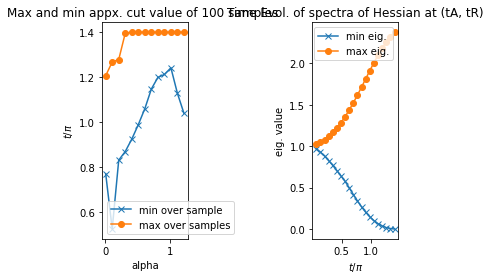

In [14]:

from scipy.optimize import minimize_scalar
m, d = (10, 4)
np.random.seed(0)    
# radius = 0.8*np.pi
alpha = np.zeros(2)
alpha[0] = 1
alpha[1] = .8

man = RealStiefel(
    m, d, alpha=alpha, log_stats=False, log_method='trust-krylov')
k = min(d, m-d)
adim = (d*(d-1))//2
tdim = adim + d*k
np.random.seed(0)    
Y = man.rand()

man.alpha[1] = 0
man.alpha[1] = .01-.1
NALX = 13
NN = 100
res = np.full((NALX, NN), fill_value=np.nan)
for alx in range(NALX):
    np.random.seed(0)
    man.alpha[1] += .1
    # cut_val = np.zeros(NN)
    print('Doing alpha=%f' % man.alpha[1])
    for ii in range(NN):
        xi = man.randvec(Y)

        def make_Q(k):
            Q0 = randn(m, k)
            Q, _ = la.qr(xi - Y@Y.T@xi)
            return Q
        Q = make_Q(d)

        def min_spec(t):
            Y1 = man.exp(Y, t*xi)
            spt = calc_hessian_spec(t*xi, Y1)
            # print(spt)
            return spt[0]*spt[0]

        ret = minimize_scalar(
            min_spec, method='bounded', bounds=(.01*np.pi, 1.4*np.pi))
        if ret['success'] and ret['fun'] < 5e-2:
            # cut_val[ii] = ret['x']
            res[alx, ii] = ret['x']
        else:
            print(ret)
    
    # print(sorted(cut_val))
np.savez_compressed('stiefel_cut_value',  res=res)
NT = 20
time_arr = np.zeros((NT, 3))
for i in range(1, NT+1):
    t = np.pi*1.4*i/NT
    Y1 = man.exp(Y, t*xi)
    spt = sorted(calc_hessian_spec(t*xi, Y1))
    time_arr[i-1, :] = np.array([t/np.pi, spt[0], spt[-1]])
print(time_arr)

import matplotlib.pyplot as plt    
# fig = plt.figure(figsize=(4, 20))
fig = plt.figure()
# fig.suptitle('Stiefel manifold n=%d p=%d. Max and min appx. cut value of %d samples ' % (m, d, NN))
ax1 = fig.add_subplot(121)
xax = np.arange(NALX)*.1+.01
ax1.plot(xax, np.nanmin(res, axis=1)/np.pi, marker='x', label='min over sample')
ax1.plot(xax, np.nanmax(res, axis=1)/np.pi, marker='o',
          label='max over samples')
ax1.set(xlabel='alpha', ylabel='$t/\\pi$')
ax1.legend()
ax1.title.set_text('Max and min appx. cut value of %d samples ' % (NN))
ax2 = fig.add_subplot(122)

ax2.plot(time_arr[:, 0], time_arr[:, 1], marker='x', label='min eig.')
ax2.plot(time_arr[:, 0], time_arr[:, 2],marker='o',
          label='max eig.')
ax2.set(xlabel='$t/\\pi$', ylabel='eig. value')
ax2.legend()
ax2.title.set_text('Time Evol. of spectra of Hessian at (tA, tR)')
fig.tight_layout()
    

